In [4]:
# demo.ipynb
%%bash
# Install requirements (only run once)
pip install -r requirements.txt
ollama pull llama2

SyntaxError: invalid syntax (1980063240.py, line 4)

In [1]:
# Cell 1: Imports and Setup
import json
import pandas as pd
from IPython.display import display, Markdown
from src.utils import load_briefs, load_experts, initialize_chroma
from src.matching_system import ProjectMatcher
from src.chroma_setup import get_chroma_collection

# Initialize system
print("🔄 Initializing system...")
briefs = load_briefs("data/briefs.json")
experts = load_experts("data/experts.json")
initialize_chroma(experts)
matcher = ProjectMatcher()
print("✅ System ready!")

🔄 Initializing system...
✅ System ready!


/Users/chandrimadas/Documents/Mocc2/src/matching_system.py:95: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  self.llm = Ollama(


In [2]:
# Cell 2: Display Sample Data
def show_sample_data():
    print("\n📋 Sample Project Briefs:")
    briefs_df = pd.DataFrame([b.dict() for b in briefs])
    display(briefs_df)
    
    print("\n👥 Expert Profiles:")
    experts_df = pd.DataFrame([e.dict() for e in experts])
    display(experts_df)

show_sample_data()


📋 Sample Project Briefs:


/var/folders/y4/0lcmny8s1696ft7y4dphy7kr0000gn/T/ipykernel_31554/3896268613.py:4: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  briefs_df = pd.DataFrame([b.dict() for b in briefs])


,title,description,required_skills,domain
0,Medical Chatbot Development,Build a HIPAA-compliant chatbot for patient tr...,"[NLP, Healthcare, Security, Python]",Healthcare
1,Retail Analytics System,Develop a computer vision-based people countin...,"[Computer Vision, Data Visualization, Python]",Retail
2,Fraud Detection API,Create machine learning models for real-time f...,"[Machine Learning, Anomaly Detection, Python]",Finance



👥 Expert Profiles:


/var/folders/y4/0lcmny8s1696ft7y4dphy7kr0000gn/T/ipykernel_31554/3896268613.py:8: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  experts_df = pd.DataFrame([e.dict() for e in experts])


,name,type,skills,experience,expertise
0,MedBot AI v4.1,AI,"[NLP, Healthcare, Multilingual Processing]",3,"[Medical Chatbots, Patient Triage]"
1,Dr. Data Security,Human,"[HIPAA Compliance, Cybersecurity, Python]",10,"[Healthcare Security, Data Protection]"
2,VisionCore AI v2.3,AI,"[Computer Vision, People Counting, OpenCV]",2,"[Retail Analytics, Real-time Systems]"
3,FraudShield AI v1.7,AI,"[Anomaly Detection, ML Models, Python]",1,"[Financial Systems, Fraud Prevention]"
4,General AI Assistant v5,AI,"[Python, Basic NLP, Data Analysis]",4,[General Purpose]


In [3]:
# Cell 3: Matching Demo
def show_matches(brief, matches):
    display(Markdown(f"## 🔍 Matching Results for: **{brief.title}**"))
    display(Markdown(f"**Domain**: {brief.domain}"))
    display(Markdown(f"**Required Skills**: {', '.join(brief.required_skills)}"))
    
    results_df = pd.DataFrame(matches)[["name", "type", "score", "reason"]]
    results_df["score"] = results_df["score"].round(2)
    display(results_df)

# Select a project brief
sample_brief = briefs[0]  # Medical Chatbot Development

# Find matches
matches = matcher.find_matches(sample_brief)

# Display results
show_matches(sample_brief, matches)

## 🔍 Matching Results for: **Medical Chatbot Development**

**Domain**: Healthcare

**Required Skills**: NLP, Healthcare, Security, Python

,name,type,score,reason
0,Candidate A,Unknown,8.0,Candidate A has strong NLP skills and some exp...


📊 Visualizing Embedding Space...


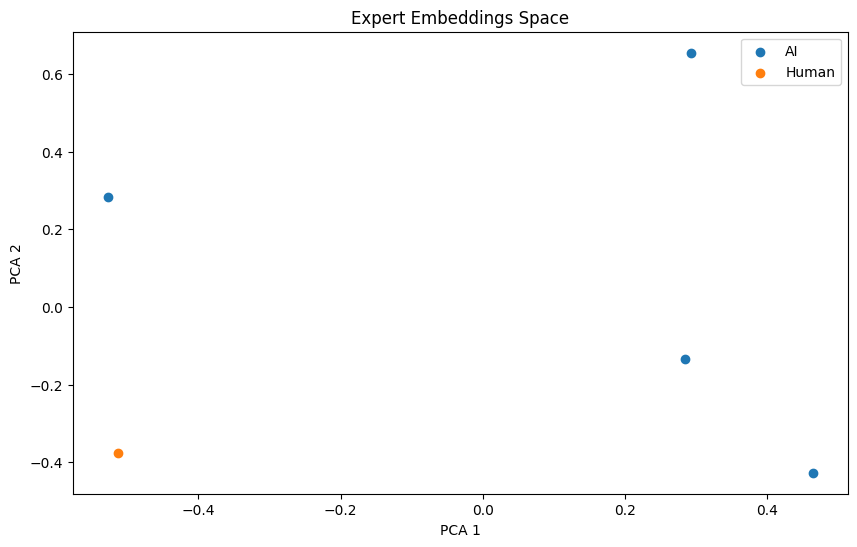

In [4]:
# Cell 4: Embedding Visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_embeddings():
    print("📊 Visualizing Embedding Space...")
    
    # Get all embeddings
    collection = get_chroma_collection()
    embeddings = collection.get(include=["embeddings"])["embeddings"]
    
    # Reduce dimensions
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)
    
    # Create plot
    plt.figure(figsize=(10, 6))
    types = [e.type for e in experts]
    domains = [e.expertise[0] for e in experts]
    
    for t in ["AI", "Human"]:
        idx = [i for i, x in enumerate(types) if x == t]
        plt.scatter(reduced[idx, 0], reduced[idx, 1], label=t)
    
    plt.title("Expert Embeddings Space")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.show()

plot_embeddings()

In [5]:
# Cell 5: Evaluation (fixed)
from evaluation.evaluate import evaluate_all
from evaluation.report_generator import generate_report
from src.models import ProjectBrief

def run_evaluation():
    print("🧪 Running Evaluation...")
    with open("data/test_cases.json") as f:
        test_data = json.load(f)
        test_cases = test_data["test_cases"]
    
    metrics = evaluate_all(test_cases, matcher)
    
    print("\n📈 Evaluation Results:")
    print(f"Precision@3: {metrics['precision@k']:.2%}")
    print(f"Mean Reciprocal Rank: {metrics['mrr']:.2f}") 
    print(f"NDCG@3: {metrics['ndcg']:.2f}")
    
    report_path = generate_report(metrics, [])
    display(Markdown(f"📄 Report generated: `{report_path}`"))

run_evaluation()

🧪 Running Evaluation...

📈 Evaluation Results:
Precision@3: 0.00%
Mean Reciprocal Rank: 0.00
NDCG@3: 0.79


📄 Report generated: `results/report_20250521_1649.md`